In [1]:
import numpy as np
import torch
import torch.nn as nn
from training import train
from NP import NP
import matplotlib.pyplot as plt
import random
from PIL import Image
from training import train
from NP import NP

import torchvision
import torchvision.datasets as datasets
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

In [2]:
def img_to_vector(imgs):
    data = [torch.from_numpy(np.asarray(img, dtype="int32").reshape(28*28, 1)).unsqueeze(0) for img in imgs]
    return torch.cat(data, dim=0).float()

def vector_to_image(vec):
    array = vec.reshape(28, 28).detach().numpy()
    img = Image.fromarray(array)
    return img.convert('RGB')

In [3]:
mnist_trainset_images = [mnist_trainset[i][0] for i in range(len(mnist_trainset)) if mnist_trainset[i][1] == 1]
mnist_trainset_digits = [mnist_trainset[i][1] for i in range(len(mnist_trainset)) if mnist_trainset[i][1] == 1]

In [4]:
mnist_trainset_arrays = img_to_vector(mnist_trainset_images)
mnist_trainset_digits = torch.tensor(mnist_trainset_digits).unsqueeze(0).transpose(0,1).float()

In [5]:
train_data = []
lin = torch.linspace(0,10,784).unsqueeze(0).transpose(0,1)
for function in mnist_trainset_arrays:
    train_data.append([lin, function*1/256])

In [6]:
model = NP(5, 1, 1)
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)

Epoch 1 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 1000. Average loss = 0.03756461292505264.
EPOCH LOSS 0.03756461292505264


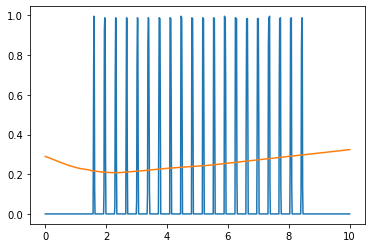

Epoch 1 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 1000. Average loss = 0.021834196522831917.
EPOCH LOSS 0.021834196522831917


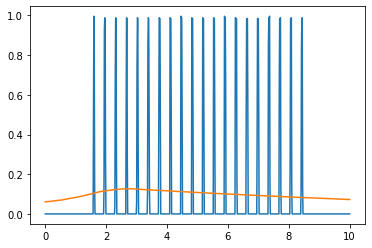

Epoch 1 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 1000. Average loss = -0.07142357528209686..
EPOCH LOSS -0.07142357528209686


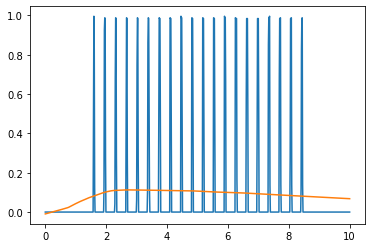

Epoch 1 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 1000. Average loss = -0.12521106004714966.
EPOCH LOSS -0.12521106004714966


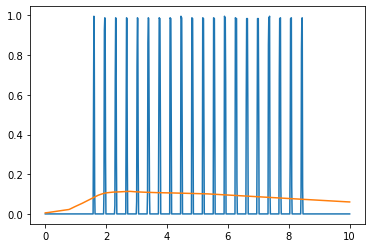

Epoch 1 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 1000. Average loss = -0.20901905000209808.
EPOCH LOSS -0.20901905000209808


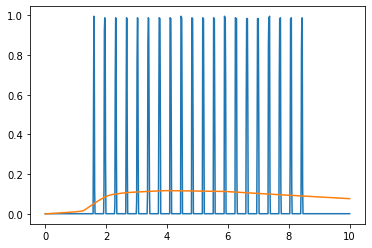

Epoch 1 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 1000. Average loss = -0.2904120981693268.
EPOCH LOSS -0.2904120981693268


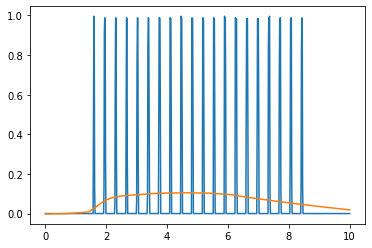

Epoch 1 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 1000. Average loss = -0.16132880747318268.
EPOCH LOSS -0.16132880747318268


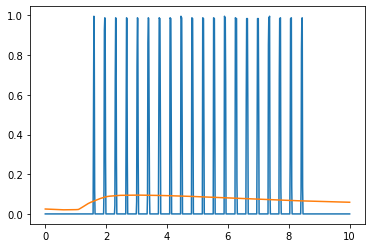

Epoch 1 Progress: |██████████████████████████████████████████████████| 100.0% Complete.  Iteration = 1000. Average loss = -0.15576596558094025.
EPOCH LOSS -0.15576596558094025


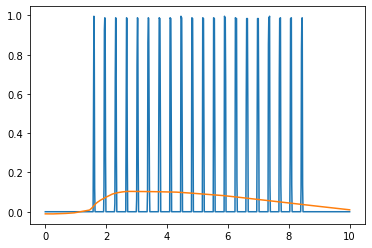

KeyboardInterrupt: 

In [7]:
points_test = 700
num_functions_train = 1000

test_x = lin
perm = torch.randperm(784)
context_y = train_data[0][1][perm][0:points_test]
context_x = train_data[0][0][perm][0:points_test]

context_y1 = [[i,train_data[0][1][i]] for i in perm[0:points_test]]
draw_y1 = []
for i in range(784):
    if i in perm[0:points_test]:
        draw_y1.append(train_data[0][1][i])
    else:
        draw_y1.append(torch.tensor([0.5]))
draw_y1 = torch.cat(draw_y1).reshape(28*28, 1)
img3 = vector_to_image(draw_y1*256)

for i in range(50):
    train(train_data[0:num_functions_train], model, 1, 100, 1, optimizer)
    mu, sigma, log_p, en_dist, t_en_dist, MSE = model(context_x, context_y, test_x)
    img1 = vector_to_image(mu.squeeze()*256)
    img2 = vector_to_image(train_data[0][1]*256)
    display(img2)
    display(img3)
    display(img1)
    
    plt.plot(train_data[1][0].numpy(), train_data[1][1].numpy())
    plt.plot(train_data[1][0].detach().numpy(), mu.detach().numpy())
    plt.show()